In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import csv
import time
import math
from sklearn.cluster import KMeans

from sklearn import preprocessing, cross_validation, neighbors
import compute_measure
import pandas as pd
from numpy import genfromtxt, savetxt

In [31]:

df = pd.read_csv("credit_risk_data_balanced.csv")

X = np.array(df.drop(['Delinquency'],1))
y = np.array(df['Delinquency'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)
#split 10% of the dataset to test the performance of each classifiers
A_train, A_test, b_train, b_test = cross_validation.train_test_split(X_train,y_train,test_size=0.2)

names = [ "k-NN",
		 "DecisionTree",
		 "RandomForest",
		 "AdaBoost",
		 "BaggingRegressor",
		 "Gradient Boosting",
		 "MLP",
		 "Bayesian Ridge"]


regressors = [
	KNeighborsRegressor(3),
	DecisionTreeRegressor(max_depth=5),
	RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
	AdaBoostRegressor(),
	BaggingRegressor(),
	GradientBoostingRegressor(),
	MLPRegressor(alpha=1e-5, hidden_layer_sizes=(100, 1),  max_iter=5000),
	linear_model.BayesianRidge()]


def get_MSE(Error):
	mse=np.sum(np.power(Error,2))
	mse=mse/len(Error)
	return mse

In [32]:
copy_names = list(names)
MSE = []
for name, reg in zip(names, regressors):
	reg.fit(A_train, b_train)
	Error_reg   = [None] * len(A_train)
	predictedIV = reg.predict(A_test)
	Error_reg   = abs(b_test - predictedIV)
	print('\n\nThe Model '+ name + ' Peformance Summary as follows:')
	print('The MSE is           {:20.16f}'.format(get_MSE(Error_reg)))
	print('The mean error is    {:20.16f}'.format(np.mean(Error_reg)))
	print('The maximum error is {:20.16f}'.format(max(Error_reg)))
	print('The minimum error is {:20.16f}'.format(min(Error_reg)))
	MSE.append(get_MSE(Error_reg))

new_regressors = sorted(zip(MSE, copy_names, regressors))[:3]

print("\n\nTop Three Regressors:")

for MSE, name, reg in new_regressors:
	print(name)
	print('The MSE is           {:20.16f}'.format(MSE))




The Model k-NN Peformance Summary as follows:
The MSE is             1.2122118380062306
The mean error is      0.9121495327102803
The maximum error is   2.0000000000000000
The minimum error is   0.0000000000000000


The Model DecisionTree Peformance Summary as follows:
The MSE is             0.6661381904435822
The mean error is      0.6550939794413131
The maximum error is   1.9565217391304348
The minimum error is   0.0434782608695652


The Model RandomForest Peformance Summary as follows:
The MSE is             0.7003327559345772
The mean error is      0.7720917627653245
The maximum error is   1.8385538420946297
The minimum error is   0.1584787921156016


The Model AdaBoost Peformance Summary as follows:
The MSE is             0.7004467223094235
The mean error is      0.7403839980930607
The maximum error is   1.8487060384870604
The minimum error is   0.1512939615129396


The Model BaggingRegressor Peformance Summary as follows:
The MSE is             0.7071551401869158
The mean error

In [33]:

print("\n\n\n")
print("Consensus Learning Method:")


prediction_results = []

new_MSE = []
new_name_list = []
new_regressors_list = []
for MSE, name, reg in new_regressors:
	reg.fit(X_train, y_train)
	Error_reg   = [None] * len(X_train)
	predictedIV = reg.predict(X_test)
	prediction_results.append(predictedIV)
	Error_reg   = abs(y_test - predictedIV)
	print('\n\nThe Model '+ name + ' Peformance Summary as follows:')
	print('The MSE is           {:20.16f}'.format(get_MSE(Error_reg)))
	print('The mean error is    {:20.16f}'.format(np.mean(Error_reg)))
	print('The maximum error is {:20.16f}'.format(max(Error_reg)))
	print('The minimum error is {:20.16f}'.format(min(Error_reg)))
	new_MSE.append(get_MSE(Error_reg))
	new_name_list.append(name)

sorted_regressors = sorted(zip(new_MSE, new_name_list, prediction_results))
print('\n\nSorted:')
sorted_new_MSE = []
for MSE, name, pred in sorted_regressors:
	print(name)
	print(MSE)
	sorted_new_MSE.append(MSE)








Consensus Learning Method:


The Model Gradient Boosting Peformance Summary as follows:
The MSE is             0.6541269538247352
The mean error is      0.6434745263892173
The maximum error is   2.0553953617411844
The minimum error is   0.0004604433568107


The Model DecisionTree Peformance Summary as follows:
The MSE is             0.6920514477331154
The mean error is      0.6634041329858147
The maximum error is   2.0000000000000000
The minimum error is   0.0000000000000000


The Model RandomForest Peformance Summary as follows:
The MSE is             0.6962928383812714
The mean error is      0.7584990344568229
The maximum error is   1.8082332693465057
The minimum error is   0.1233552107977272


Sorted:
Gradient Boosting
0.654126953825
DecisionTree
0.692051447733
RandomForest
0.696292838381


In [34]:
# weighting algorithm #1
weights_1 = (1/sorted_new_MSE[0])/(1/np.sum(sorted_new_MSE))
weights_2 = (1/sorted_new_MSE[1])/(1/np.sum(sorted_new_MSE))
weights_3 = (1/sorted_new_MSE[2])/(1/np.sum(sorted_new_MSE))

# weighting algorithm #2
weights_4 = (1/math.pow(sorted_new_MSE[0], 2))/(1/math.pow(np.sum(sorted_new_MSE), 2))
weights_5 = (1/math.pow(sorted_new_MSE[1], 2))/(1/math.pow(np.sum(sorted_new_MSE), 2))
weights_6 = (1/math.pow(sorted_new_MSE[2], 2))/(1/math.pow(np.sum(sorted_new_MSE), 2))

# weighting algorithm #3
weights_7 = (1/math.log(math.pow(sorted_new_MSE[0], 2)))/(1/math.log(math.pow(np.sum(sorted_new_MSE), 2)))
weights_8 = (1/math.log(math.pow(sorted_new_MSE[1], 2)))/(1/math.log(math.pow(np.sum(sorted_new_MSE), 2)))
weights_9 = (1/math.log(math.pow(sorted_new_MSE[2], 2)))/(1/math.log(math.pow(np.sum(sorted_new_MSE), 2)))


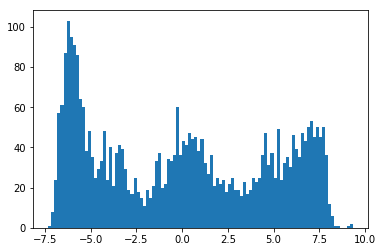

In [37]:
print("\n\n\n")
prediction_sum = np.zeros_like(prediction_results[0])
prediction_sum.fill(0)

for i in range(y_test.size):
	prediction_sum[i] = prediction_results[0][i]*weights_1 + prediction_results[1][i]*weights_2 + prediction_results[2][i]*weights_3
   
plt.hist(prediction_sum, bins = 100)
plt.show()

In [38]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(prediction_sum.reshape(-1, 1))
kmeans.cluster_centers_

array([[ 4.40697284],
       [-4.08422155]])

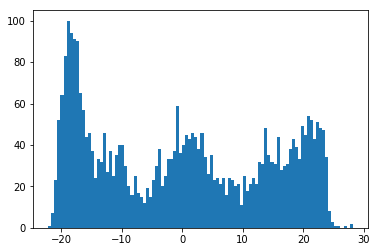

In [39]:
print("\n\n\n")
prediction_sum = np.zeros_like(prediction_results[0])
prediction_sum.fill(0)

for i in range(y_test.size):
	prediction_sum[i] = prediction_results[0][i]*weights_4 + prediction_results[1][i]*weights_5 + prediction_results[2][i]*weights_6

plt.hist(prediction_sum, bins = 100)
plt.show()

In [40]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(prediction_sum.reshape(-1, 1))
kmeans.cluster_centers_

array([[ 13.1059218],
       [-12.4752238]])

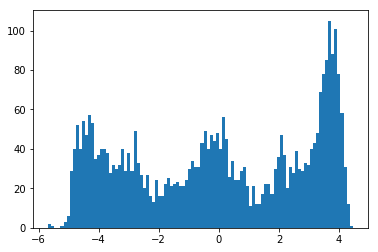

In [41]:
print("\n\n\n")
prediction_sum = np.zeros_like(prediction_results[0])
prediction_sum.fill(0)



for i in range(y_test.size):
    prediction_sum[i] = prediction_results[0][i]*weights_7 + prediction_results[1][i]*weights_8 + prediction_results[2][i]*weights_9

plt.hist(prediction_sum, bins = 100)
plt.show()

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(prediction_sum.reshape(-1, 1))
kmeans.cluster_centers_

array([[ 2.67383816],
       [-2.22553719]])